# Test file
### Run any code you would like to test

In [2]:
import mne
import numpy as np
import matplotlib.pyplot as plt

In [3]:
data = mne.io.read_raw_edf("data/n1.edf")
data.info

Extracting EDF parameters from C:\Users\brade\Documents\School\College\Grad School\Duke\BME 671L SPAM\BME671-Final-Project\data\n1.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


<Info | 7 non-empty values
 bads: []
 ch_names: ROC-LOC, LOC-ROC, F2-F4, F4-C4, C4-P4, P4-O2, F1-F3, F3-C3, ...
 chs: 21 EEG
 custom_ref_applied: False
 highpass: 0.3 Hz
 lowpass: 30.0 Hz
 meas_date: 2009-01-01 22:06:03 UTC
 nchan: 21
 projs: []
 sfreq: 512.0 Hz
>

In [5]:
data.ch_names

['ROC-LOC',
 'LOC-ROC',
 'F2-F4',
 'F4-C4',
 'C4-P4',
 'P4-O2',
 'F1-F3',
 'F3-C3',
 'C3-P3',
 'P3-O1',
 'C4-A1',
 'EMG1-EMG2',
 'ECG1-ECG2',
 'TERMISTORE',
 'TORACE',
 'ADDOME',
 'Dx1-DX2',
 'SX1-SX2',
 'Posizione',
 'HR',
 'SpO2']

> At least 3 EEG: F3 or F4, C3 or C4 and O1 or O2, referred to A1 or A2

> Additional EEG bipolar traces: Fp1-F3, F3-C3, C3-P3, P3-O1 and/or Fp2-F4, F4-C4, C4-P4, P4-O2

In [8]:
raw_data = data.get_data()

In [9]:
fs = 512 #Hz
dt = 1/fs
t = np.arange(0, raw_data.shape[1]*dt, dt)

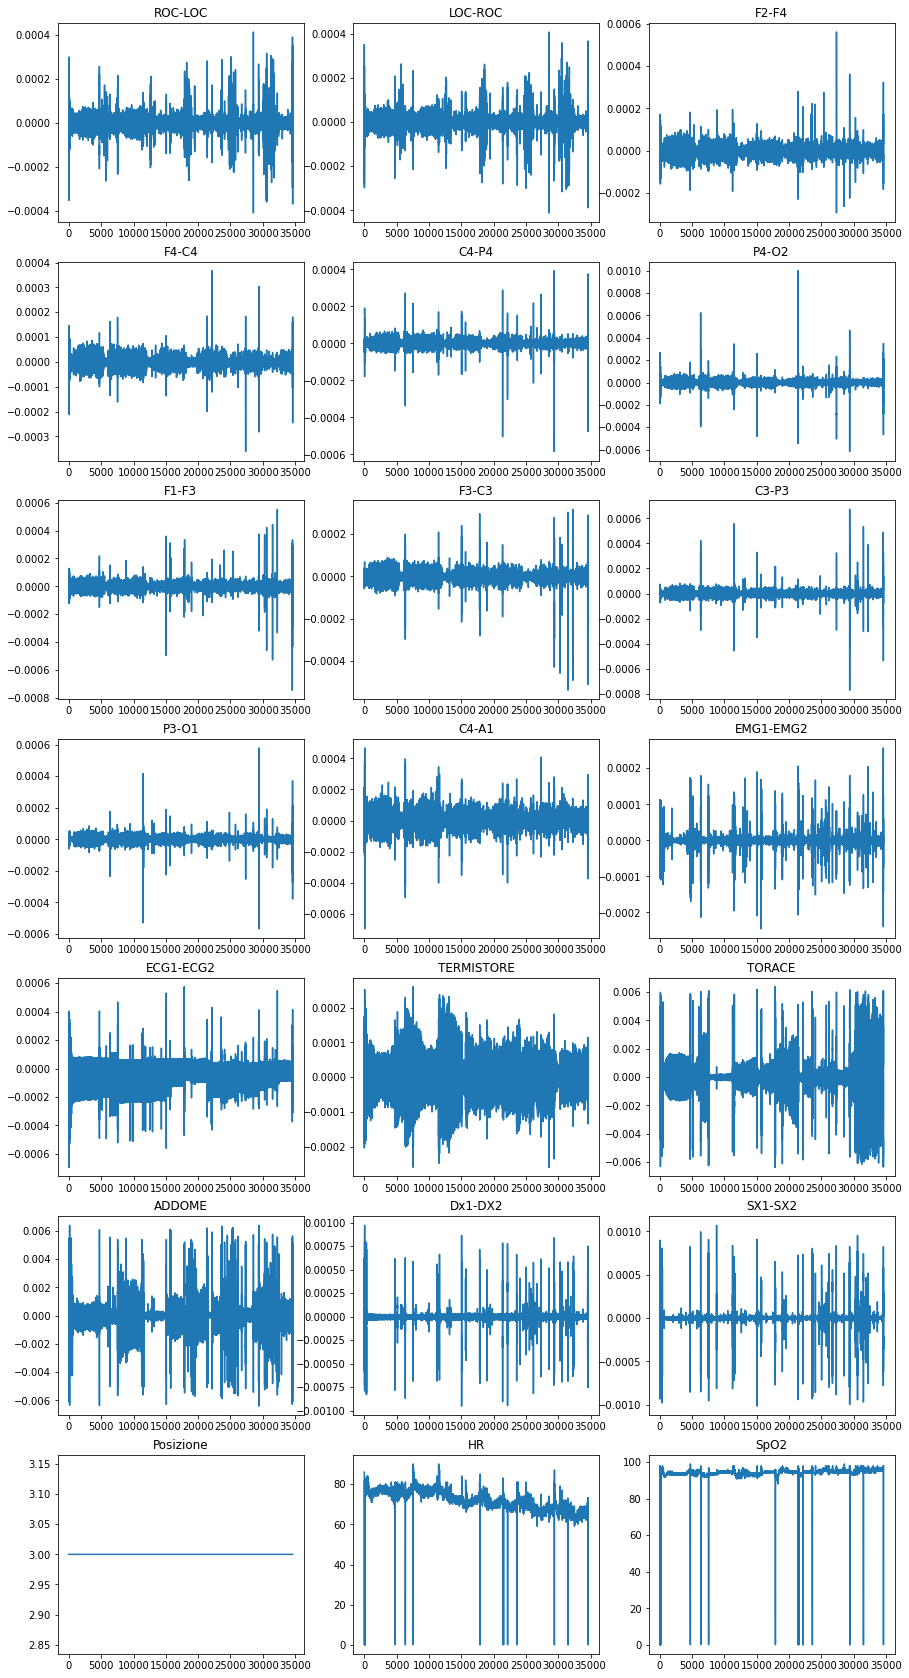

In [8]:
fig, ax = plt.subplots(7,3, figsize = (15,30))
for i in range(21):
    ax[i//3, i%3].plot(t, raw_data[i])
    ax[i//3, i%3].set_title(data.ch_names[i])

In [4]:
# FT Function from Lab 10

def ExploreFTplots(hn, zeropad, FS):
    '''
    Inputs:
    hn: 1D input signal
    zeropad: number of zero padding to the right side of hn
    FS: sampling frequency in Hz
    
    fvec - > 1D Vector specify the frequency domain
    FTOutput - > Fourier Transform result with DC centered in the middle of the array
    
    '''
    # do padding
    zeropaddedhn = np.pad(hn, zeropad)
    
    # construct fvec with given function inputs
    fvec= np.linspace(-FS/2, FS/2, len(zeropaddedhn))
    
    # compute the fft result
    fft_result = np.fft.fft(zeropaddedhn)
    
    # perform the fft shift so that DC is centered in the resulting array
    FTOutput = np.fft.fftshift(fft_result)

    return fvec, FTOutput

# FT plotting function
def FTplot(fvec, FT):
    ft_mag = np.abs(FT)
    plt.plot(fvec, ft_mag)
    plt.title('{} FFT'.format(FT))
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Magnitude')
    plt.show()

In [ ]:
# Look at referential EEG traces (NOT bipolar) for simplicity: C4-A1
c4a1 = data['C4-A1'][0]
c4a1_clip = c4a1[0:1000]
fvec, c4a1_FT = ExploreFTplots(c4a1_clip, 0, fs)
FTplot(fvec, c4a1_FT)